In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import resultcomp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plots
import json
import numpy as np
mpl.rcParams['figure.dpi'] = 300

In [6]:
directories= ['baseline', 'model']

In [7]:
snational, seast, swest = resultcomp.read_results(directories=directories)

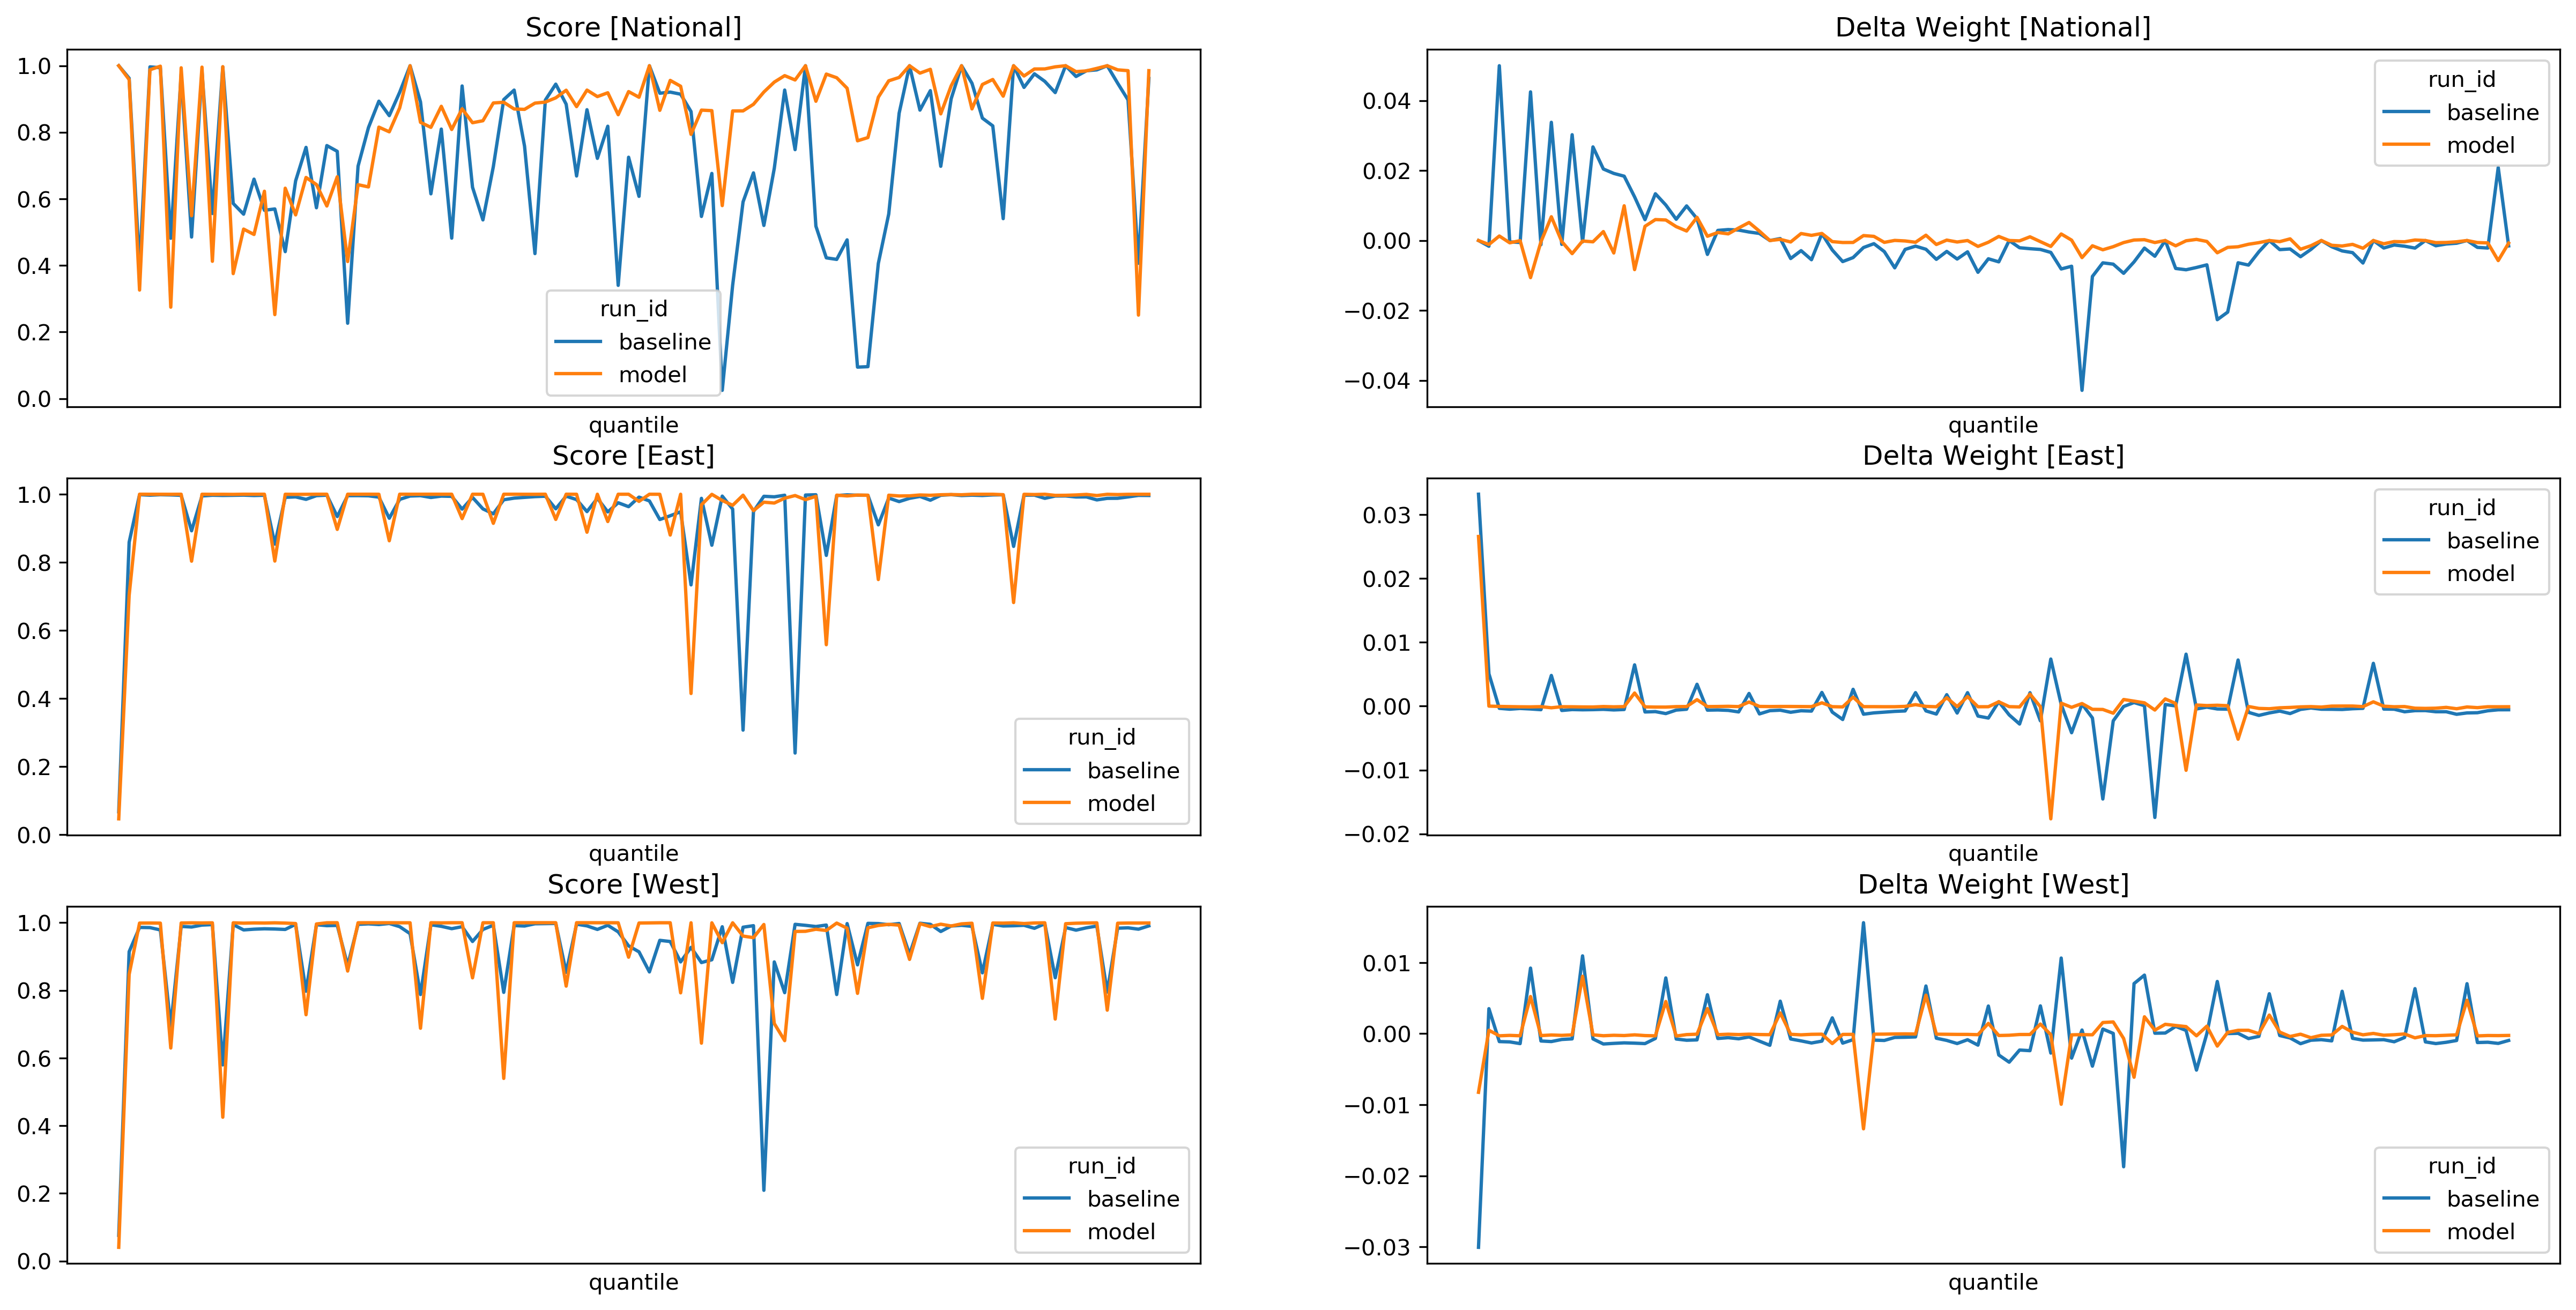

In [8]:
_ = resultcomp.plot_scores(snational, seast, swest)

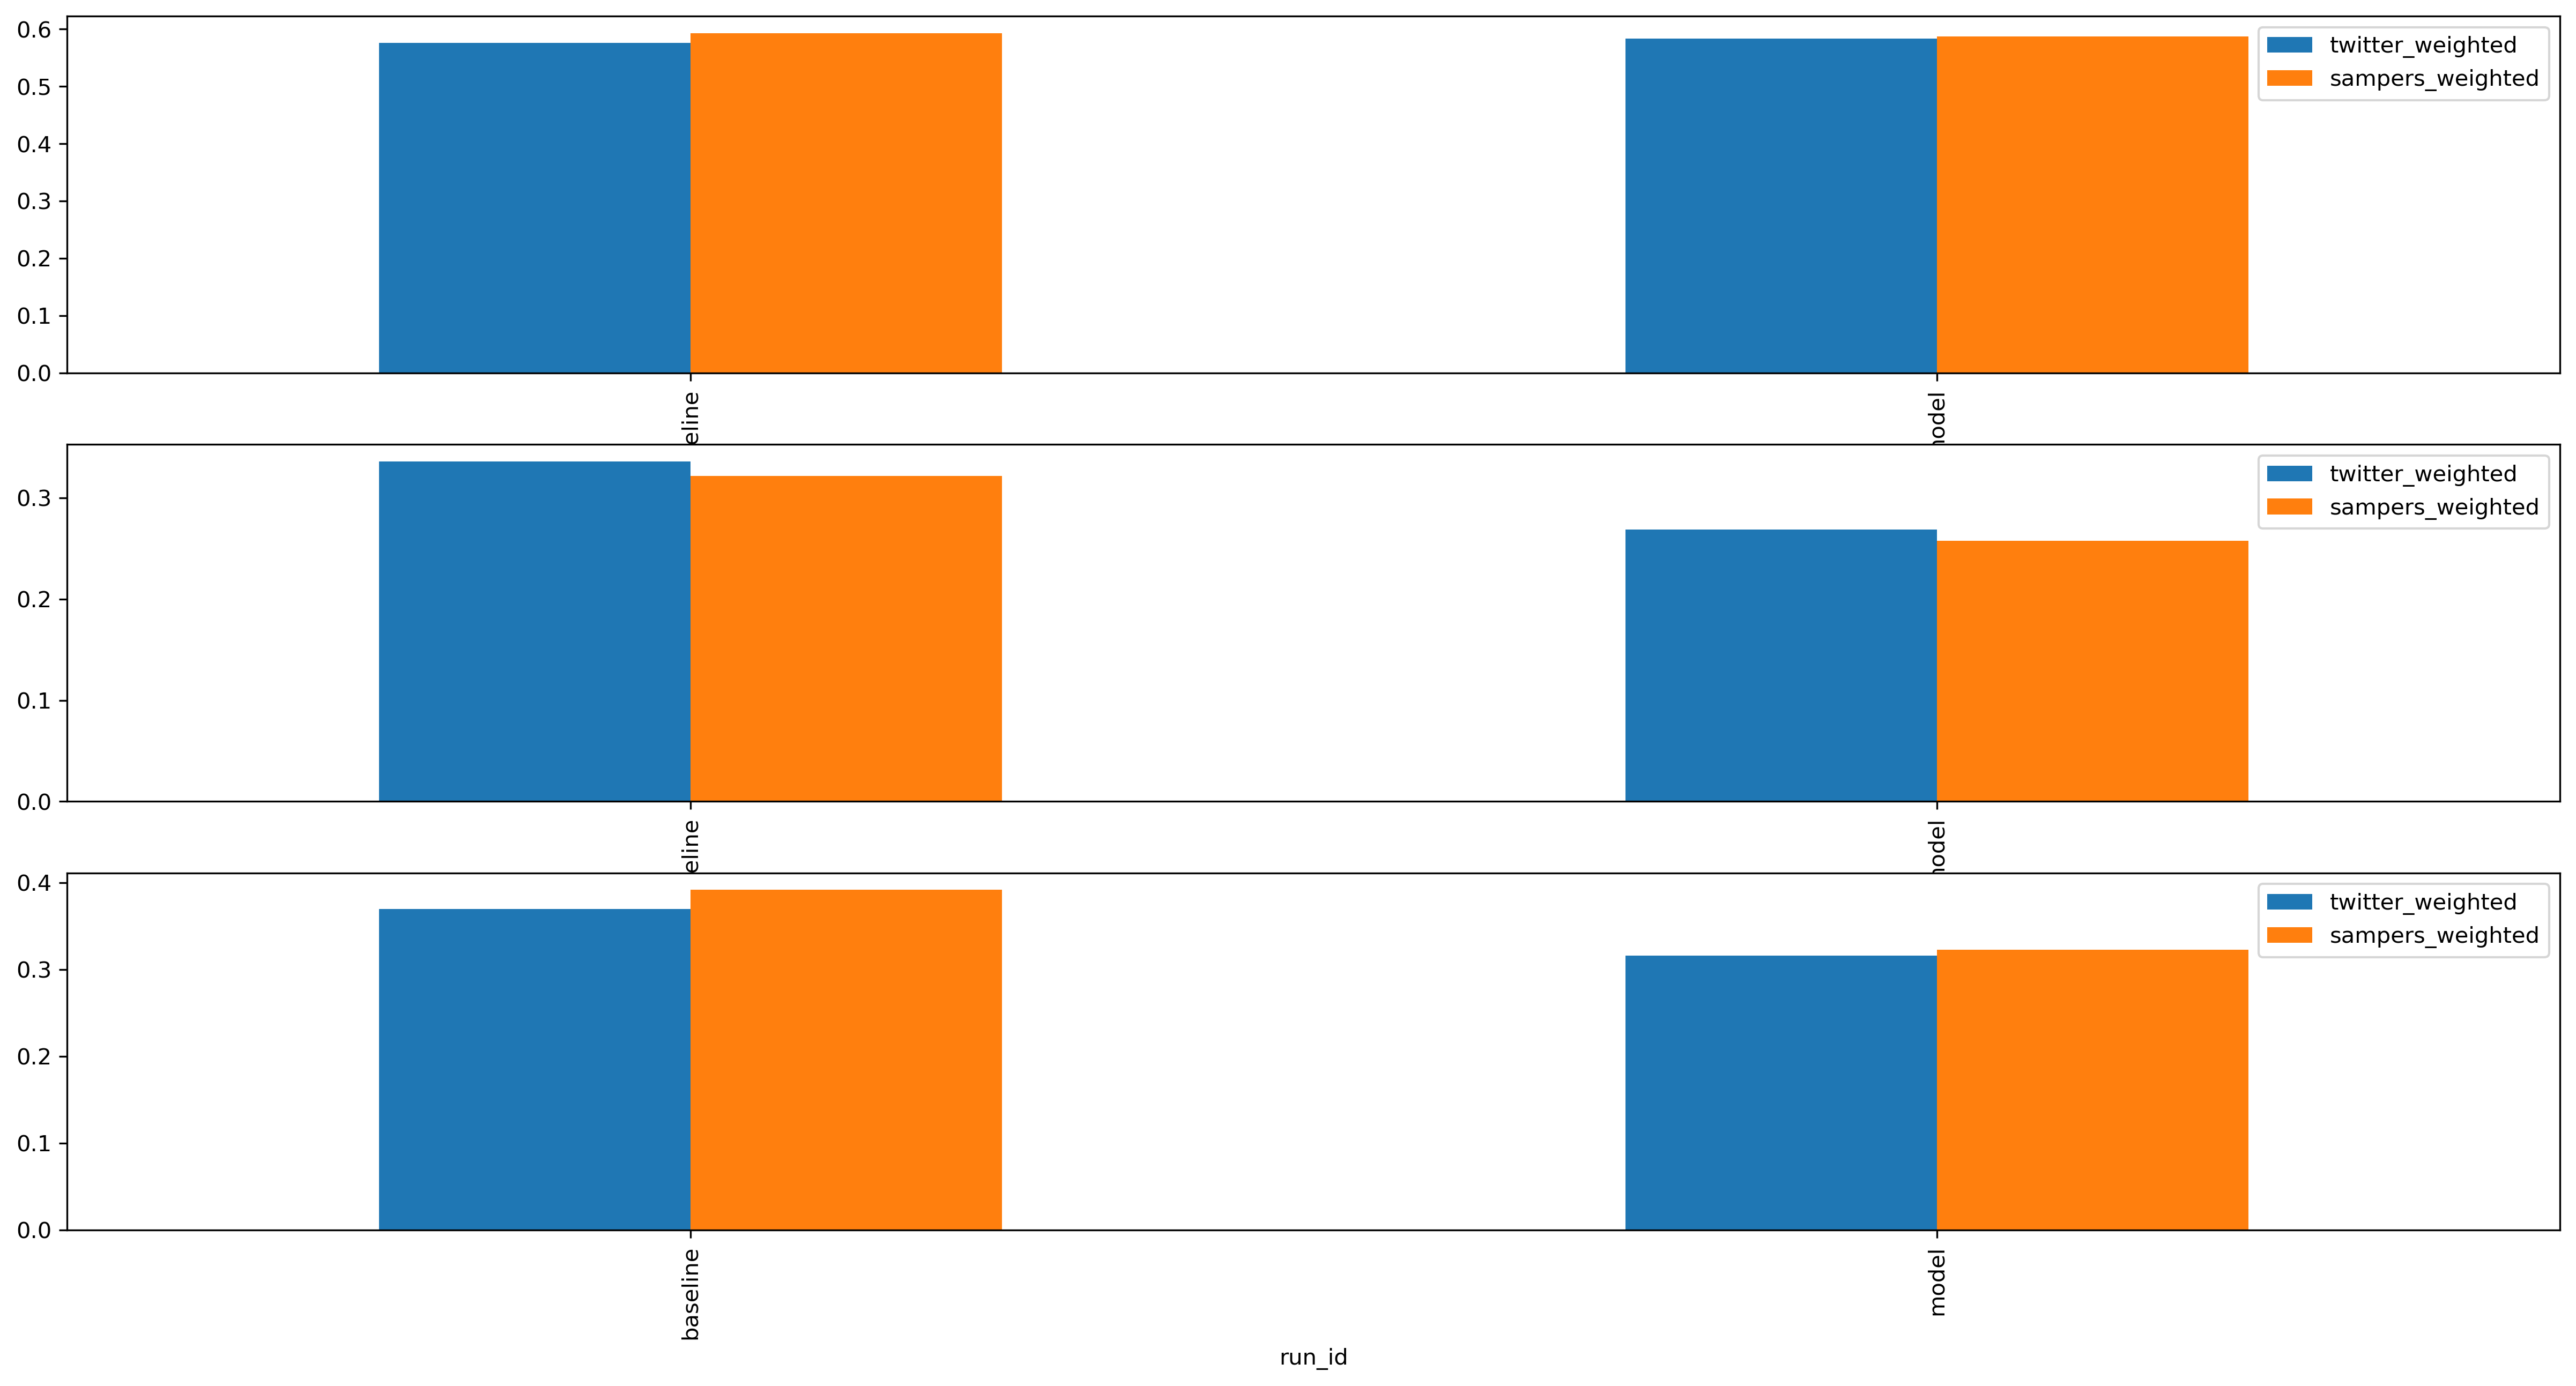

In [9]:
_ = resultcomp.plot_score_summary(snational, seast, swest)

In [6]:
with open('./../../results/model/parameters.json') as f:
    d = json.load(f)

In [7]:
d['visits']['model']['region_sampling']['beta']

0.03

# First round of parameter tuning

In [27]:
mse = resultcomp.results_mse(directories=None, start='20200515_173829', end='20200516_031006').set_index('directory')

In [28]:
mse

,scale,p,gamma,beta,mse
directory,,,,,
20200515_173829,national,0.3,0.2,0.01,0.000018
20200515_174008,national,0.3,0.2,0.04,0.000042
20200515_175036,national,0.3,0.8,0.07,0.000050
20200515_175053,national,0.3,0.2,0.07,0.000054
20200515_181000,national,0.3,0.5,0.01,0.000013
...,...,...,...,...,...
20200516_004314,west,0.9,0.2,0.07,0.000161
20200516_013857,west,0.3,0.5,0.07,0.000055
20200516_022407,west,0.6,0.5,0.07,0.000021


In [29]:
mse = mse.sort_values('mse')
mse['tot_mse'] = mse.groupby('directory').apply(lambda x: x['mse'].sum())
mse.sort_values('tot_mse')

,scale,p,gamma,beta,mse,tot_mse
directory,,,,,,
20200515_200759,west,0.6,0.8,0.04,0.000011,0.000038
20200515_200759,national,0.6,0.8,0.04,0.000021,0.000038
20200515_200759,east,0.6,0.8,0.04,0.000006,0.000038
20200515_184232,national,0.3,0.8,0.04,0.000014,0.000038
20200515_184232,west,0.3,0.8,0.04,0.000019,0.000038
...,...,...,...,...,...,...
20200515_203535,east,0.9,0.2,0.04,0.000272,0.000538
20200515_203535,national,0.9,0.2,0.04,0.000047,0.000538
20200515_203425,national,0.9,0.2,0.01,0.000032,0.000816


In [30]:
params = mse.groupby(['p', 'gamma', 'beta']).sum()['mse'].reset_index()
params

,p,gamma,beta,mse
0,0.3,0.2,0.01,0.000288
1,0.3,0.2,0.04,0.000088
2,0.3,0.2,0.07,0.000071
3,0.3,0.5,0.01,0.000166
4,0.3,0.5,0.04,0.000042
5,0.3,0.5,0.07,0.000125
6,0.3,0.8,0.01,0.000137
7,0.3,0.8,0.04,0.000038
8,0.3,0.8,0.07,0.000157
9,0.6,0.2,0.01,0.000530


In [20]:
p = params.query("mse < 0.00005")
p.shape

(4, 4)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(p, x='p', y='gamma', z='beta',
              color='mse')
fig.show()

# Second round of parameter tuning

In [31]:
mse2 = resultcomp.results_mse(directories=None, start='20200516_110344', end='20200518_050952', include_model=True).set_index('directory')

In [32]:
mse2.shape[0] / 3

28.0

In [33]:
mse2 = mse2.sort_values('mse')
mse2['tot_mse'] = mse2.groupby('directory').apply(lambda x: x['mse'].sum())
mse2.sort_values('tot_mse')

,scale,p,gamma,beta,mse,tot_mse
directory,,,,,,
model,east,0.4,0.75,0.03,0.000012,0.000026
model,national,0.4,0.75,0.03,0.000008,0.000026
model,west,0.4,0.75,0.03,0.000006,0.000026
20200517_235708,east,0.4,0.80,0.03,0.000010,0.000027
20200517_235708,national,0.4,0.80,0.03,0.000011,0.000027
...,...,...,...,...,...,...
20200516_143137,west,0.3,0.85,0.05,0.000039,0.000078
20200516_143137,east,0.3,0.85,0.05,0.000008,0.000078
baseline,west,NaN,NaN,NaN,0.000025,0.000195


In [34]:
params2 = mse2.groupby(['p', 'gamma', 'beta']).sum()['mse'].reset_index()
params2.sort_values('mse')

,p,gamma,beta,mse
18,0.4,0.75,0.03,0.000026
21,0.4,0.80,0.03,0.000027
12,0.3,0.80,0.03,0.000029
9,0.3,0.75,0.03,0.000031
24,0.4,0.85,0.03,0.000032
19,0.4,0.75,0.04,0.000034
13,0.3,0.80,0.04,0.000035
25,0.4,0.85,0.04,0.000035
10,0.3,0.75,0.04,0.000036
22,0.4,0.80,0.04,0.000036


In [35]:
p2 = params2.query("mse < 0.00004")
p2.shape

(11, 4)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(p2, x='p', y='gamma', z='beta',
              color='mse')
fig.show()

In [36]:
mse.shape

(84, 6)

In [26]:
mse = mse.drop('baseline')
mse2 = mse2.drop('baseline')

In [73]:
mse_no_overlap = mse[~((mse.p == 0.3) & (mse.gamma == 0.8) & (mse.beta == 0.04))]
mse_all = pd.concat([mse_no_overlap,mse2])
for (i,r) in mse_all.sort_values('tot_mse').loc['baseline'].iterrows():
    print("{}: {:.5e}".format(r.scale, r.mse))

west: 2.51541e-05
east: 2.06107e-05
west: 2.51541e-05
national: 1.48754e-04
east: 2.06107e-05
national: 1.48754e-04


In [74]:
mse_all = mse_all.groupby(['p', 'gamma', 'beta']).sum()['mse'].reset_index().sort_values('mse')
mse_all['mse_str'] = mse_all['mse'].apply(lambda x: "{:.5e}".format(x))


In [75]:
mse_all

,p,gamma,beta,mse,mse_str
26,0.4,0.75,0.03,0.000026,2.56810e-05
29,0.4,0.80,0.03,0.000027,2.71464e-05
19,0.3,0.80,0.03,0.000029,2.92414e-05
15,0.3,0.75,0.03,0.000031,3.08277e-05
32,0.4,0.85,0.03,0.000032,3.22093e-05
27,0.4,0.75,0.04,0.000034,3.39069e-05
20,0.3,0.80,0.04,0.000035,3.46409e-05
33,0.4,0.85,0.04,0.000035,3.50982e-05
16,0.3,0.75,0.04,0.000036,3.59413e-05
30,0.4,0.80,0.04,0.000036,3.62470e-05


In [76]:
mse_all[['p', 'gamma', 'beta', 'mse_str']].to_clipboard(sep="&", excel=True, index=False)

Text(0.5, 1.02, 'B')

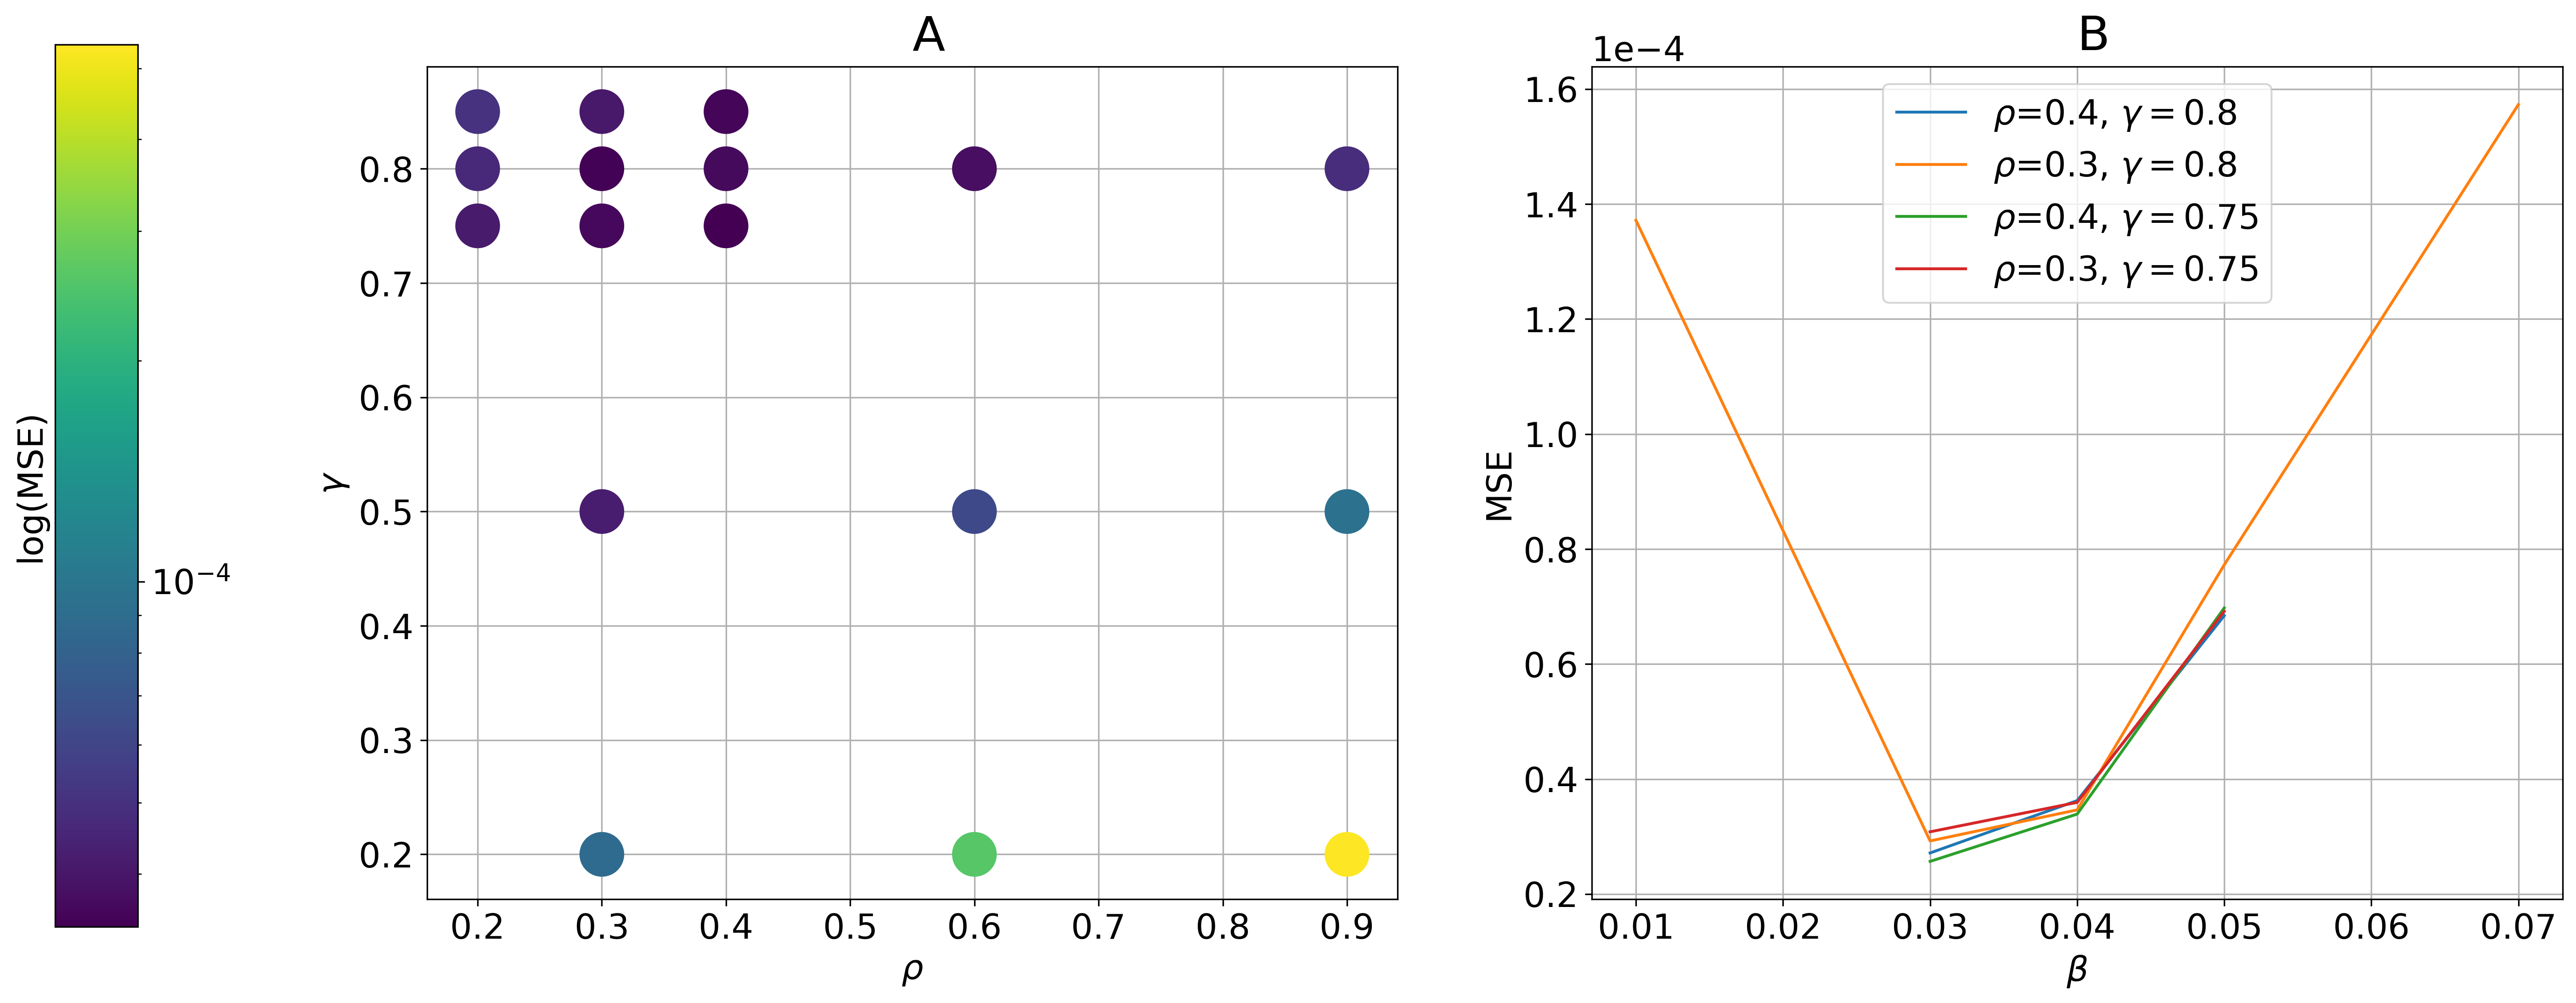

In [25]:
from matplotlib.ticker import StrMethodFormatter
mpl.rcParams['font.size'] = 18.0
exploration_plot_data = mse_all[mse_all.beta == 0.04]
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))
#ax1.set_xticks([0.2, 0.3, 0.4])
#ax1.set_yticks([0.75, 0.8, 0.85])
s = ax1.scatter(
    exploration_plot_data.p, 
    exploration_plot_data.gamma, 
    c=exploration_plot_data.mse,
    norm=mpl.colors.LogNorm(vmin=exploration_plot_data.mse.min(), vmax=exploration_plot_data.mse.max()),
    s=500,
    zorder=2
)
ax1.set_xlabel(r'$\rho$')
ax1.set_ylabel(r'$\gamma$')
ax1.grid(True)
ax1.text(.5, 1.02, "A", transform=ax1.transAxes, fontsize='25')
cbaxes = fig.add_axes([-0.01, 0.1, 0.03, 0.8])
cbar = fig.colorbar(s, ax=ax1, cax=cbaxes)
cbar.ax.set_ylabel('log(MSE)', rotation=90)
cbar.ax.yaxis.set_label_position('left')

beta_plot_data = mse_all[(mse_all.p == 0.4) & (mse_all.gamma == 0.8)].sort_values(by='beta')
ax2.plot(beta_plot_data.beta, beta_plot_data.mse, label=r'$\rho$=0.4, $\gamma=0.8$')
beta_plot_data2 = mse_all[(mse_all.p == 0.3) & (mse_all.gamma == 0.8)].sort_values(by='beta')
ax2.plot(beta_plot_data2.beta, beta_plot_data2.mse, label=r'$\rho$=0.3, $\gamma=0.8$')
beta_plot_data3 = mse_all[(mse_all.p == 0.4) & (mse_all.gamma == 0.75)].sort_values(by='beta')
ax2.plot(beta_plot_data3.beta, beta_plot_data3.mse, label=r'$\rho$=0.4, $\gamma=0.75$')
beta_plot_data4 = mse_all[(mse_all.p == 0.3) & (mse_all.gamma == 0.75)].sort_values(by='beta')
ax2.plot(beta_plot_data4.beta, beta_plot_data4.mse, label=r'$\rho$=0.3, $\gamma=0.75$')
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax2.grid(True)
ax2.legend(loc='upper center')
ax2.set_xlabel(r'$\beta$')
ax2.set_ylabel('MSE')
ax2.text(.5, 1.02, "B", transform=ax2.transAxes, fontsize='25')
#fig.tight_layout()

# DMS

In [10]:
dms = resultcomp.read_distance_metrics(directories=directories)


In [48]:
dms = dms[dms['sampers_mean'] != 0.0]
dms = dms.reset_index()
dms['run_id'] = dms['run_id'].str.title()
dms = dms.set_index(['scale', 'run_id', 'distance'])
dms.loc['east']

model_mean  gravity_seed_mean  gravity_mean  \
run_id   distance                                                             
Baseline (-0.001, 3.211]      7.011238e-06       5.927266e-07  2.904154e-06   
         (3.211, 5.192]       6.900103e-07       5.532856e-07  1.150596e-06   
         (5.192, 6.939]       3.601686e-07       5.235326e-07  7.001736e-07   
         (6.939, 8.647]       2.155986e-07       4.971497e-07  4.828820e-07   
         (8.647, 10.313]      1.787946e-07       4.725876e-07  3.808646e-07   
...                                    ...                ...           ...   
Model    (277.455, 291.861]   1.348000e-09       1.242168e-10  1.701775e-10   
         (291.861, 312.377]   1.031256e-09       7.546845e-11  9.852102e-11   
         (312.377, 348.792]   2.018273e-09       3.462532e-11  7.108424e-11   
         (348.792, 444.055]   5.657178e-09       6.630085e-12  2.613306e-11   
         (444.055, 1442.945]  6.614774e-09       2.104339e-13  1.148998e-12   

                              sampers_mean  model_variance  \
run_id   distance                                            
Baseline (-0.001, 3.211]      7.370865e-06    1.173148e-08   
         (3.211, 5.192]       7.699187e-07    2.350621e-11   
         (5.192, 6.939]       4.483360e-07    6.792630e-12   
         (6.939, 8.647]       2.938864e-07    2.214923e-12   
         (8.647, 10.313]      2.514278e-07    3.344990e-12   
...                                    ...             ...   
Model    (277.455, 291.861]   2.954753e-12    2.186634e-15   
         (291.861, 312.377]   1.933675e-12    1.250911e-15   
         (312.377, 348.792]   7.672736e-13    1.778700e-15   
         (348.792, 444.055]   1.113444e-14    8.501455e-15   
         (444.055, 1442.945]  3.479308e-18    8.700035e-15   

                              gravity_seed_variance  gravity_variance  \
run_id   distance                                                       
Baseline (-0.001, 3.211]               2.259008e-16      3.667999e-09   
         (3.211, 5.192]                9.021649e-17      4.818767e-11   
         (5.192, 6.939]                6.232140e-17      1.314980e-11   
         (6.939, 8.647]                5.433544e-17      4.030578e-12   
         (8.647, 10.313]               4.638674e-17      3.033697e-12   
...                                             ...               ...   
Model    (277.455, 291.861]            2.370254e-22      1.081770e-18   
         (291.861, 312.377]            1.756223e-22      2.378505e-19   
         (312.377, 348.792]            1.032500e-22      7.177434e-20   
         (348.792, 444.055]            2.361236e-23      1.011536e-20   
         (444.055, 1442.945]           7.854768e-26      3.585498e-23   

                              sampers_variance  model_sum  gravity_seed_sum  \
run_id   distance                                                             
Baseline (-0.001, 3.211]          1.943457e-08   0.647109      5.470629e-02   
         (3.211, 5.192]           2.181541e-11   0.063684      5.106494e-02   
         (5.192, 6.939]           1.681111e-11   0.033241      4.831891e-02   
         (6.939, 8.647]           4.295125e-12   0.019898      4.588394e-02   
         (8.647, 10.313]          1.158260e-11   0.016502      4.361795e-02   
...                                        ...        ...               ...   
Model    (277.455, 291.861]       8.587053e-22   0.000124      1.146447e-05   
         (291.861, 312.377]       4.315411e-22   0.000095      6.965285e-06   
         (312.377, 348.792]       9.650734e-23   0.000186      3.195778e-06   
         (348.792, 444.055]       4.838871e-26   0.000522      6.119171e-07   
         (444.055, 1442.945]      1.221909e-31   0.000611      1.942178e-08   

                               gravity_sum   sampers_sum  
run_id   distance                                         
Baseline (-0.001, 3.211]      2.680418e-01  6.803014e-01  
         (3.211, 5.192]       1.061931e-01

Baseline MSE: 1.48754e-04
Model MSE: 7.92894e-06


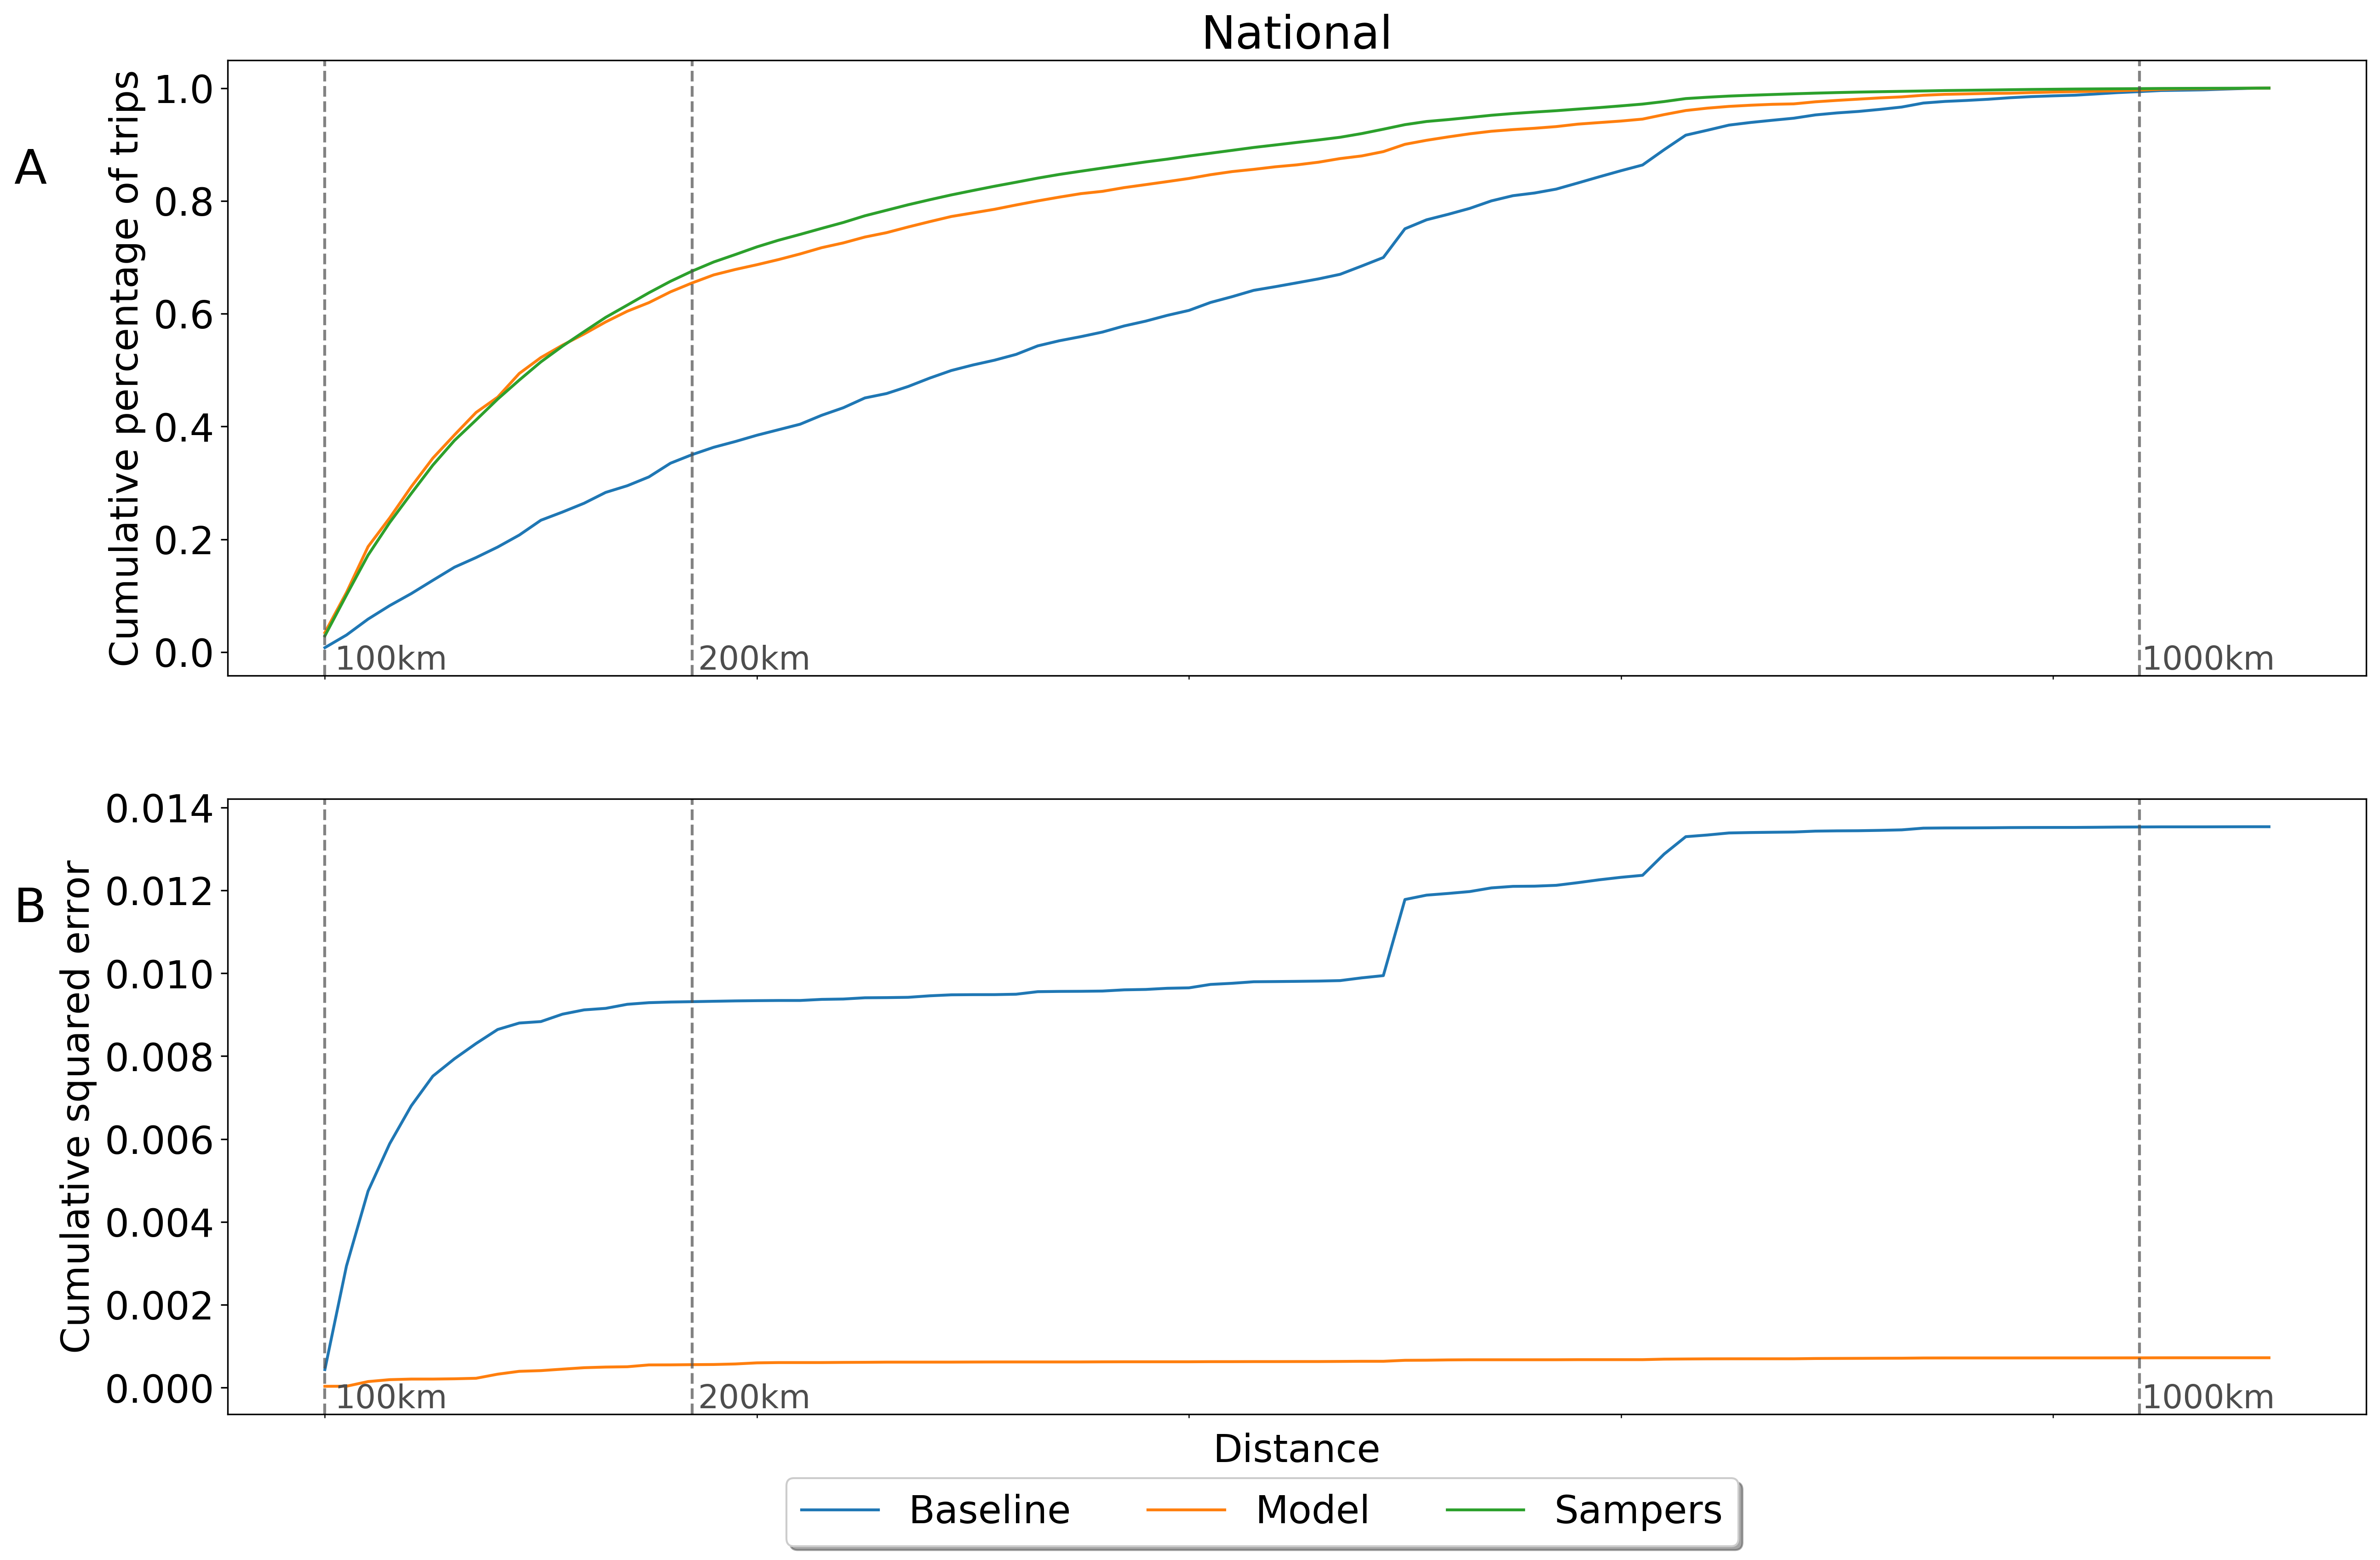

In [14]:
fig, axes = plots.plot_dist_distribution(dms, 'national')

axes[0].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.05, 0.01, "100km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.05, 0.01, "100km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(17, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(17, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.22, 0.01, "200km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.22, 0.01, "200km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(84, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(84, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.895, 0.01, "1000km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.895, 0.01, "1000km", transform=axes[1].transAxes, fontsize='17', c='0.3')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
      fancybox=True, shadow=True, ncol=3, bbox_transform = plt.gcf().transFigure)
#fig.savefig('national_dd.png', dpi=160, bbox_inches='tight')

Baseline MSE: 2.06107e-05
Model MSE: 1.16927e-05


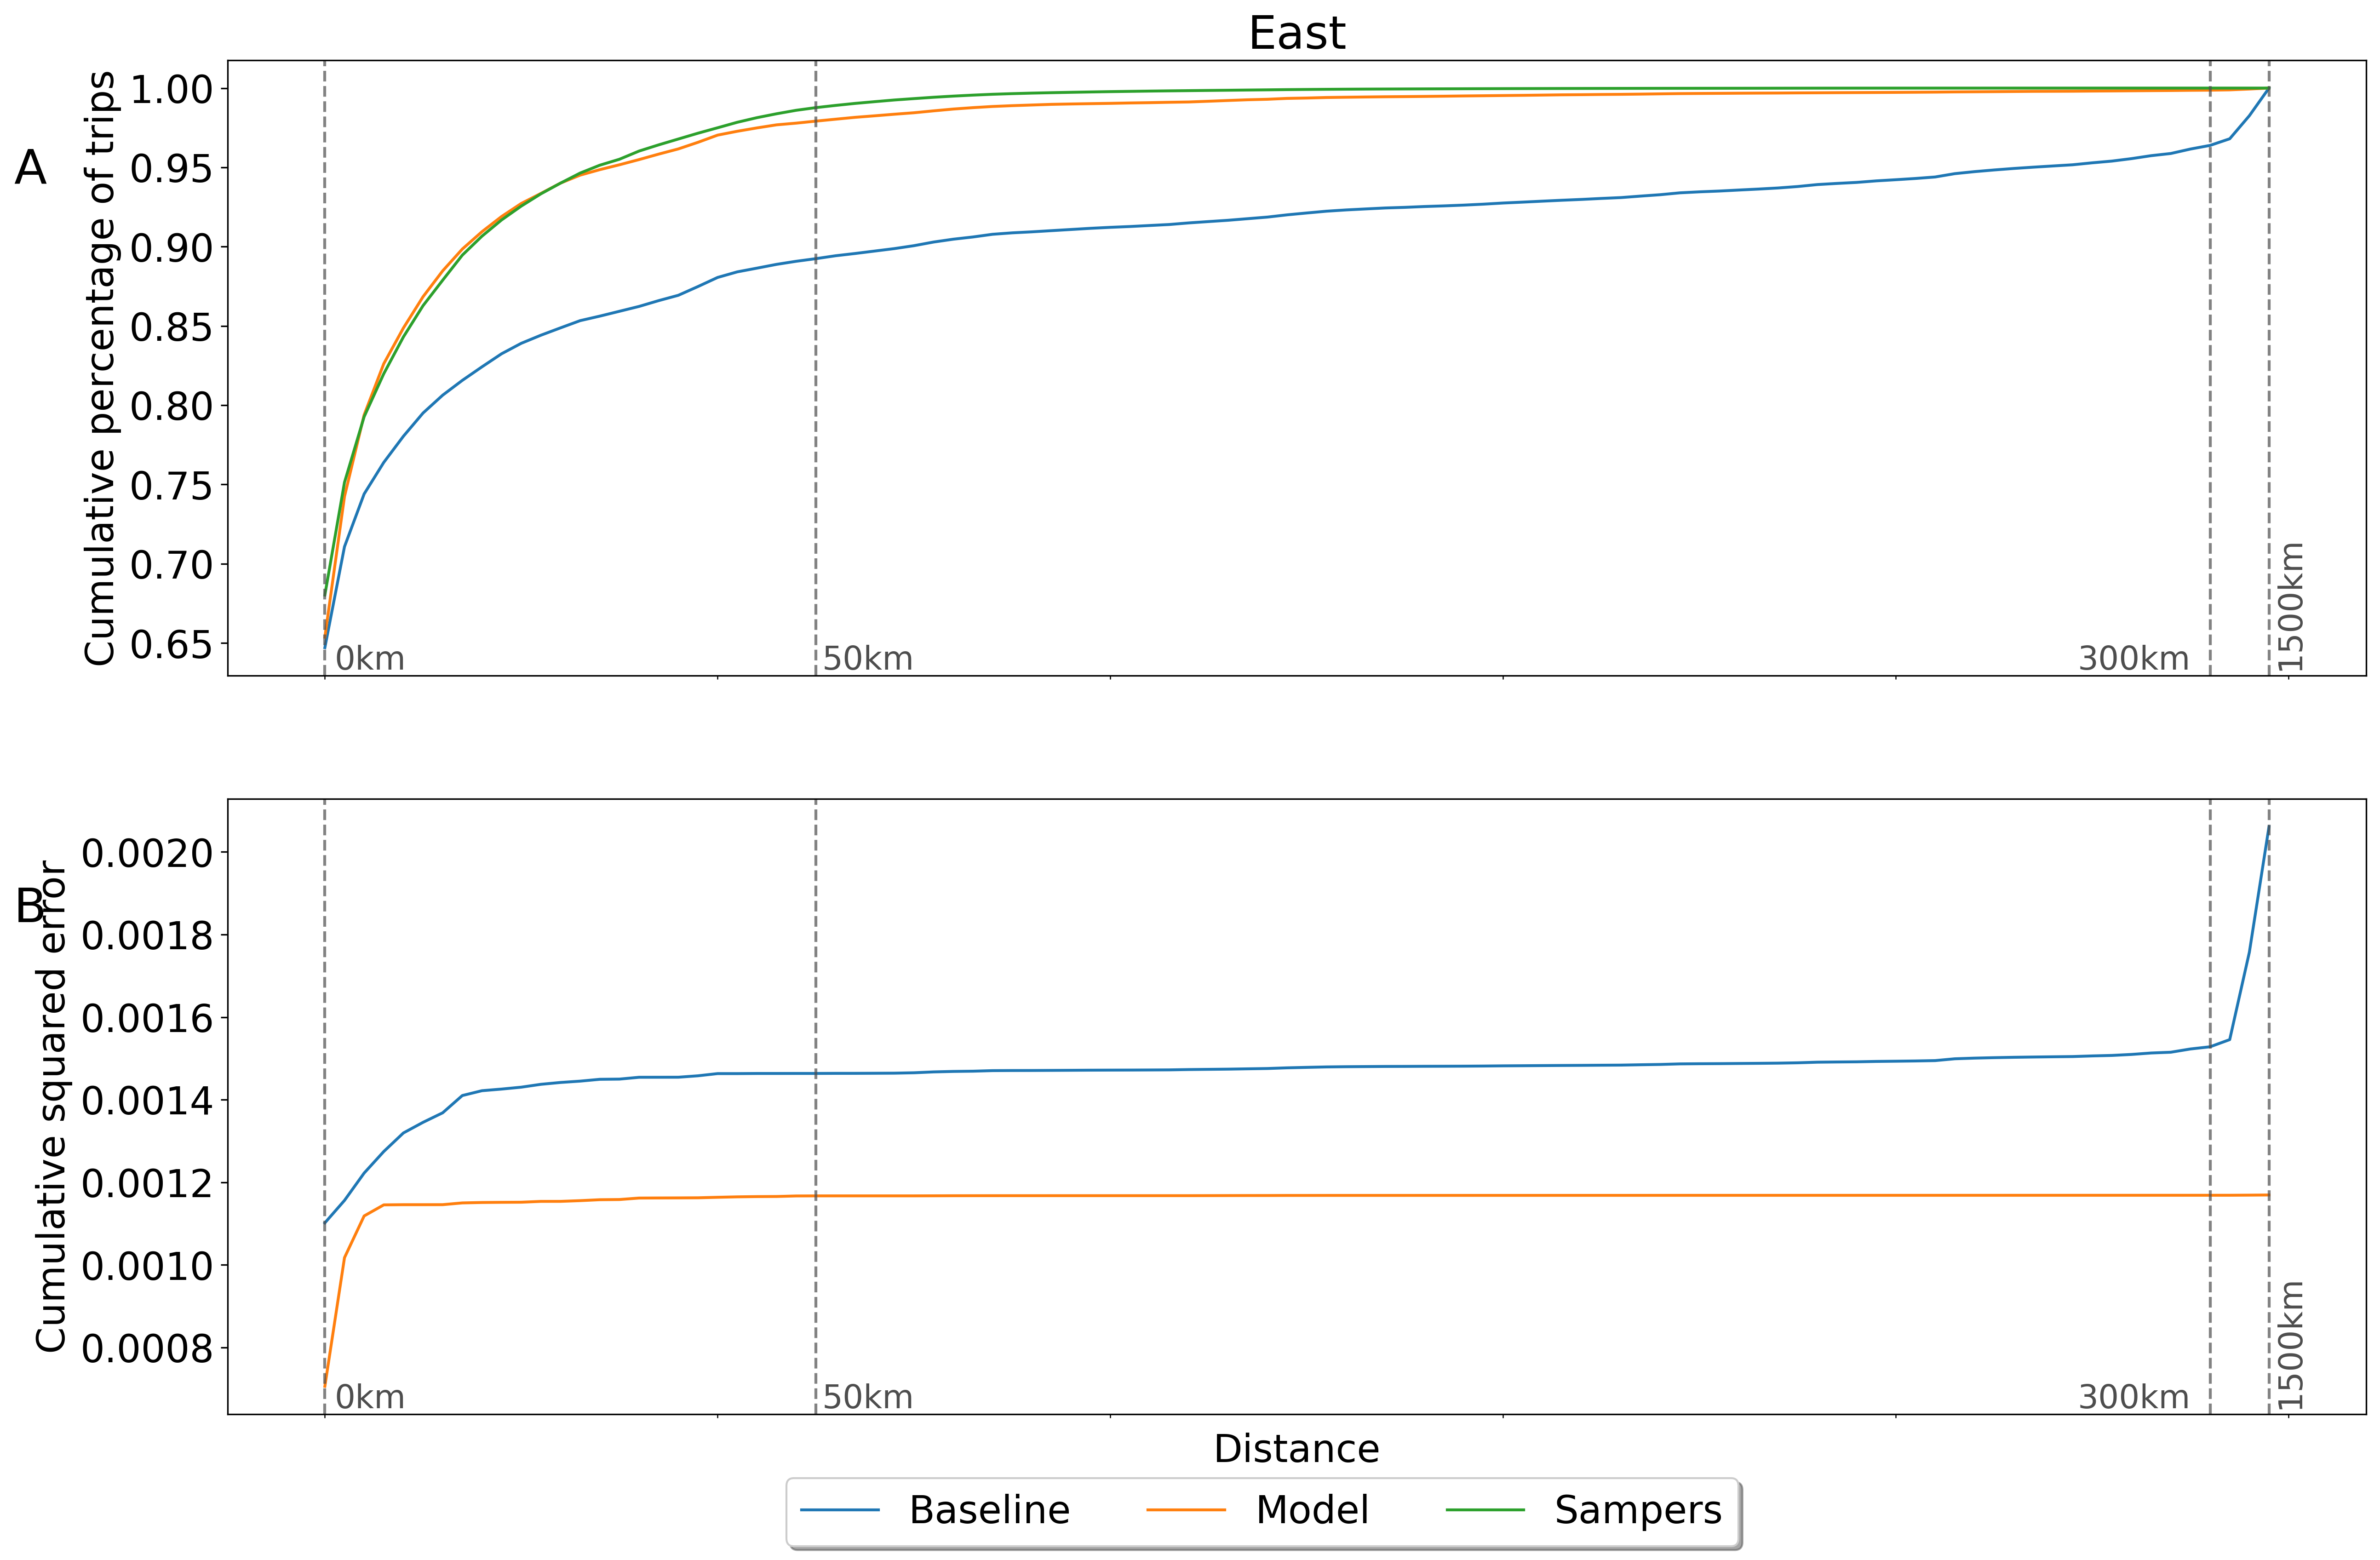

In [112]:
fig, axes = plots.plot_dist_distribution(dms, 'east')

axes[0].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.05, 0.01, "0km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.05, 0.01, "0km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(25, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(25, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.278, 0.01, "50km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.278, 0.01, "50km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(96, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(96, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.865, 0.01, "300km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.865, 0.01, "300km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(99, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(99, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.957, 0.02, "1500km", transform=axes[0].transAxes, fontsize='17', c='0.3', rotation='vertical')
axes[1].text(0.957, 0.02, "1500km", transform=axes[1].transAxes, fontsize='17', c='0.3', rotation='vertical')


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
      fancybox=True, shadow=True, ncol=3, bbox_transform = plt.gcf().transFigure)
#fig.savefig('east_dd.png', dpi=160, bbox_inches='tight')

Baseline MSE: 2.51541e-05
Model MSE: 6.05935e-06


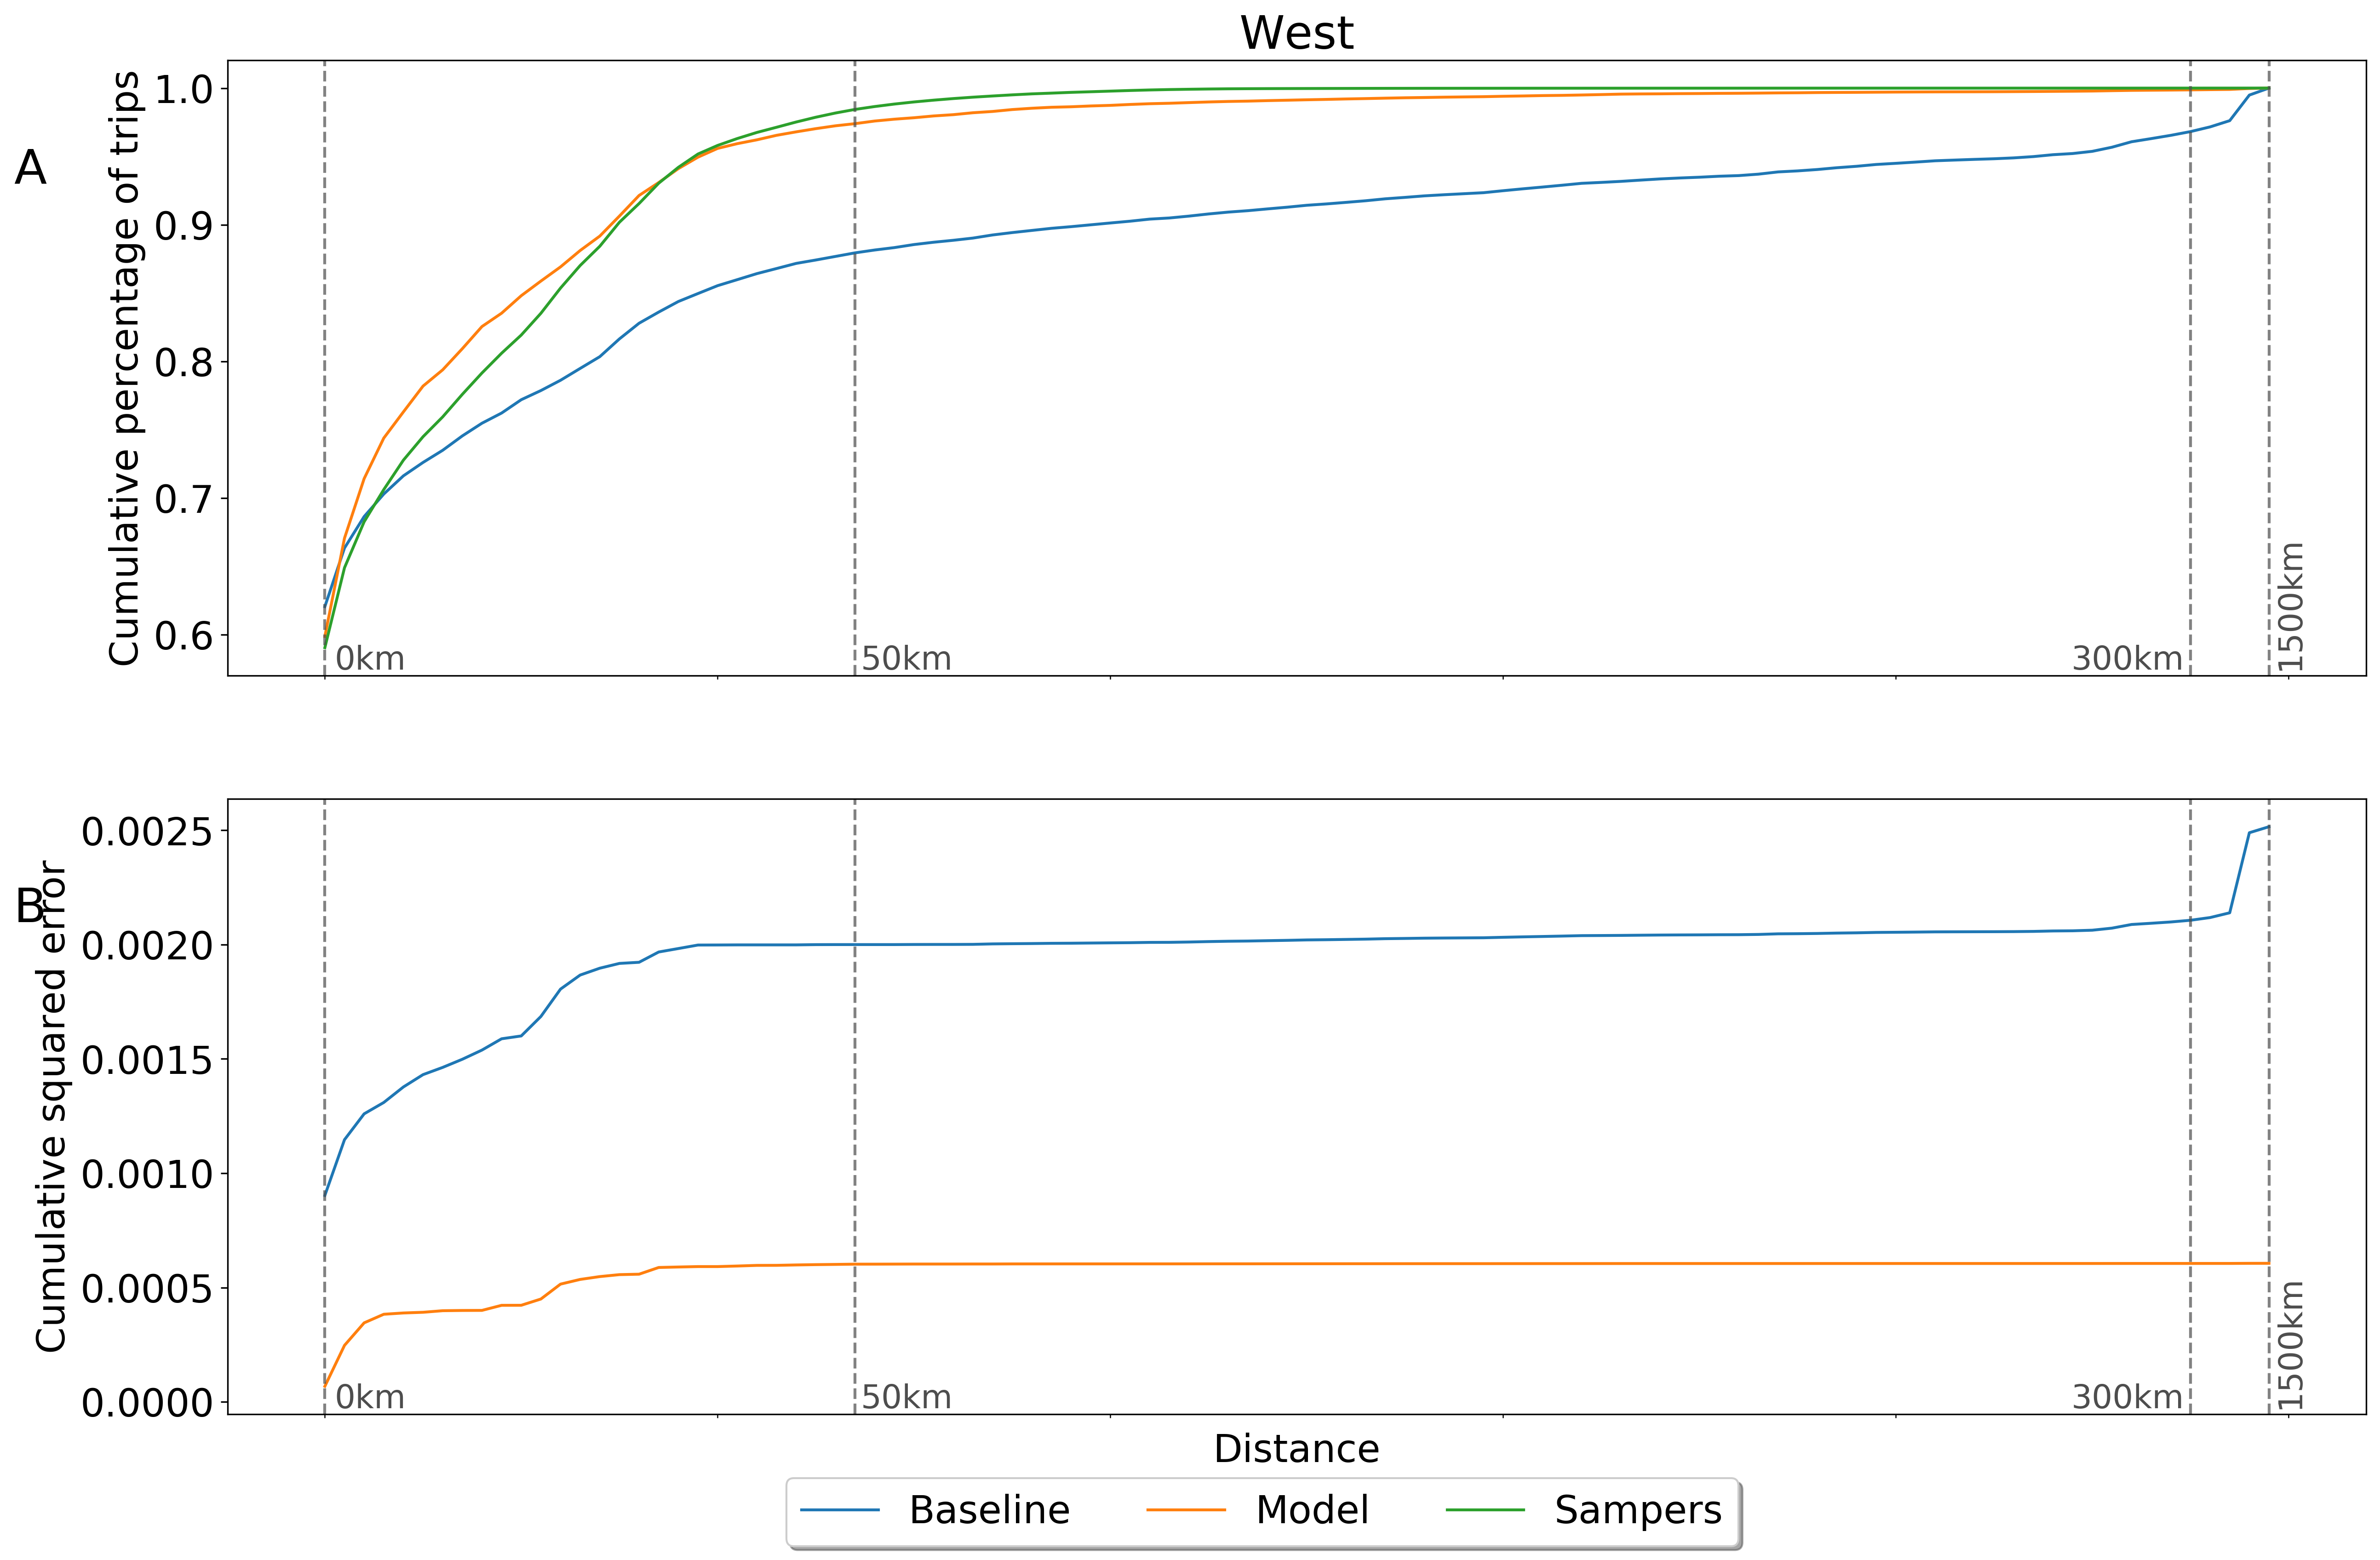

In [113]:
fig, axes = plots.plot_dist_distribution(dms, 'west')

axes[0].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(0, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.05, 0.01, "0km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.05, 0.01, "0km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(27, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(27, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.296, 0.01, "50km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.296, 0.01, "50km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(95, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(95, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.862, 0.01, "300km", transform=axes[0].transAxes, fontsize='17', c='0.3')
axes[1].text(0.862, 0.01, "300km", transform=axes[1].transAxes, fontsize='17', c='0.3')

axes[0].axvline(99, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[1].axvline(99, 0, 1, ls='--', c='0.3', alpha=0.7)
axes[0].text(0.957, 0.02, "1500km", transform=axes[0].transAxes, fontsize='17', c='0.3', rotation='vertical')
axes[1].text(0.957, 0.02, "1500km", transform=axes[1].transAxes, fontsize='17', c='0.3', rotation='vertical')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1),
      fancybox=True, shadow=True, ncol=3, bbox_transform = plt.gcf().transFigure)
fig.savefig('west_dd.png', dpi=160, bbox_inches='tight')